2022-07-18 10:15:43,175 [INFO   ] Found DB at /Users/ecortez/Work/Notes/webapp-proj/jupyter_dashboard/data_collection_analysis_tutorial.db, appending!


/Users/ecortez/opt/anaconda3/lib/python3.9/site-packages/aepsych/plotting.py:70: UserWarning: Threshold estimation may not be accurate for non-monotonic models.
  warnings.warn(
/Users/ecortez/opt/anaconda3/lib/python3.9/site-packages/aepsych/plotting.py:130: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


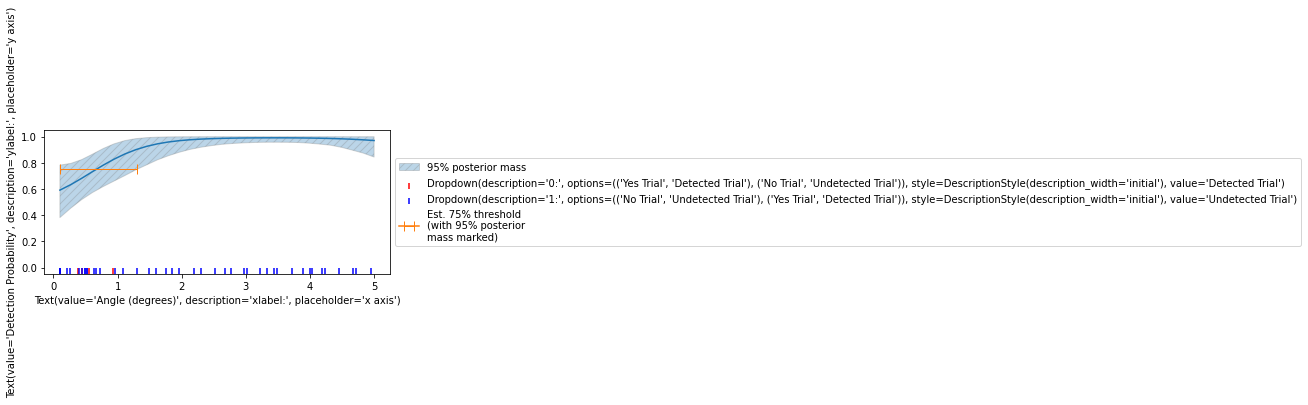

/Users/ecortez/opt/anaconda3/lib/python3.9/site-packages/aepsych/plotting.py:70: UserWarning: Threshold estimation may not be accurate for non-monotonic models.
  warnings.warn(
/Users/ecortez/opt/anaconda3/lib/python3.9/site-packages/aepsych/plotting.py:130: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


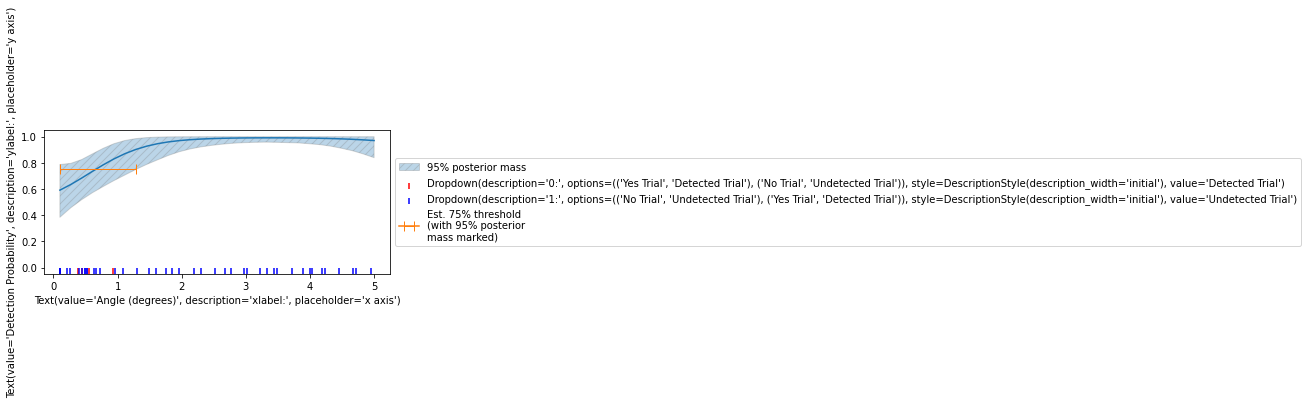

In [94]:
from aepsych.server import AEPsychServer
from aepsych.plotting import plot_strat
import ipywidgets as widgets
from IPython.display import display, HTML
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import Layout, Button, Box, FloatText, Text, Dropdown, Label,BoundedFloatText
# !pip install voila
database_path = "/Users/ecortez/Work/Notes/webapp-proj/jupyter_dashboard/data_collection_analysis_tutorial.db"

# This should run whenever a new db is uploaded
serv = AEPsychServer(database_path=database_path)
strat = serv.get_strat_from_replay()

#---------- Style ----------
display(HTML('<h1 style="text-align: center;">AEPsych Visualization tool</h1>'))
style = {'description_width': 'initial', "padding": "10px"}

#---------- Inputs -----------

def on_value_change(change):
    file_output.clear_output()
    with file_output:
        print(change['new'])

uploader = widgets.FileUpload(
    description="Resume Session",
    accept=".db",
    multiple=False
    )

input_zero = widgets.Dropdown(
    options=[('Yes Trial', "Detected Trial"), ('No Trial', "Undetected Trial")],
    value="Detected Trial",
    description='0:',
    style=style
)
input_one = widgets.Dropdown(
    options=[ ('No Trial', "Undetected Trial"), ('Yes Trial', "Detected Trial")],
    value="Undetected Trial",
    description='1:',
    style=style
)

target_level = widgets.BoundedFloatText(
    value=0.75,
    min=0,
    max=1,
    step=0.1,
    description='target_level:',
    disabled=False,
    style=style
)

cred_level = widgets.BoundedFloatText(
    value=0.95,
    min=0,
    max=1,
    step=0.1,
    description='cred_level:',
    disabled=False,
    style=style
)

xlabel = widgets.Text(
    value='Angle (degrees)',
    placeholder='x axis',
    description='xlabel:',
    disabled=False
)

ylabel = widgets.Text(
    value='Detection Probability',
    placeholder='y axis',
    description='ylabel:',
    disabled=False
)

# Observes input changes
file_output = widgets.Output(layout={
    'border': '1px solid black',
    'margin': '10px',
    'height': '30px'})
uploader.observe(on_value_change, names='value')
# display(uploader, file_output)

# inputs_output = widgets.Output(layout={'border': '1px solid black'})
input_zero.observe(on_value_change, names='value')
input_one.observe(on_value_change, names='value')
target_level.observe(on_value_change, names='value')
cred_level.observe(on_value_change, names='value')
xlabel.observe(on_value_change, names='value')
ylabel.observe(on_value_change, names='value')
#------------ Buttons ------------
button_upload = widgets.Button(
    description='Upload',
    disabled=False,
    button_style='warning',
    tooltip='Click to Upload',
    icon='check')
button_submit = widgets.Button(
    description='Submit',
    disabled=False,
    button_style='warning',
    tooltip='submit',
    icon='check')

tab = widgets.Tab()    
# out = widgets.Output(layout={'border': '1px solid black'})

children = [
     widgets.VBox([uploader,file_output,button_upload]),
     widgets.VBox([input_zero,
                   input_one,
                   target_level,
                   cred_level,
                   xlabel,
                   ylabel,    
                   button_submit]),
]
tab.children = children
tab.set_title(0, "Upload")
tab.set_title(1, "Plot")
display(tab)


def upload():
    with file_output:
        print('\n -----Now this is how your file looks like:----- \n')
        file_output.clear_output()
        if uploader.value == {}:
            print("No file uploaded")
        else: 
#Maybe add a function to check file format 
            print('File uploaded successfuly...')
        
def upload_clicked(b):
    upload()


def submit():
#     display("0", input_zero.value)
#     display("1",input_one.value)
#     display("target", target_level.value)
#     display("cred", cred_level.value)
#     display("x", xlabel.value)
#     display("y", ylabel.value)
#     print("input submited...")
    return plot_strat(strat, xlabel=xlabel, ylabel=ylabel, yes_label=input_one, no_label=input_zero, cred_level=cred_level.value, target_level=target_level.value)
        
def submit_clicked(b):
    submit()

button_upload.on_click(upload_clicked)
button_submit.on_click(submit_clicked)